# **Import Libraries**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [2]:
tips=pd.read_csv("/content/tip.csv")

# **Explore Dataset**

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
tips.shape

(244, 7)

# **Data Preprocessing**

In [8]:
missing_values=tips.isnull().sum()
duplicate_value=tips.duplicated().sum()
print("Missing Values:\n",missing_values)
print("\nDuplicate Values:",duplicate_value)

Missing Values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Duplicate Values: 1


In [9]:
tips=tips.drop_duplicates()

In [10]:
tips.duplicated().sum()

np.int64(0)

 ---
 **Binary Class Classification**

---







# **Catogerical & Numerical Columns**

In [12]:
categorical_values=tips.select_dtypes(include=['object']).columns
numerical_values=tips.select_dtypes(exclude=['object']).columns
print("Categorical Values:\n",categorical_values)
print("\nNumerical Values:\n",numerical_values)

Categorical Values:
 Index(['sex', 'smoker', 'day', 'time'], dtype='object')

Numerical Values:
 Index(['total_bill', 'tip', 'size'], dtype='object')


# **Label Encoding**

In [13]:
#label Encodeing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
tips['sex']=le.fit_transform(tips['sex'])
tips['smoker']=le.fit_transform(tips['smoker'])
tips['day']=le.fit_transform(tips['day'])
tips['time']=le.fit_transform(tips['time'])

# **Feature Engineering**

In [14]:
median_bill=tips['total_bill'].median()
tips['high_bill']=(tips['total_bill']>median_bill).astype(int)

In [15]:
x=tips.drop(['total_bill','high_bill'],axis=1)
y=tips['high_bill']

# **Train Test Split**

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# **Scaling**

In [18]:
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)

# **Build Model**

In [21]:
model=Sequential([
    tf.keras.layers.Dense(6,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,603 (10.17 KB)

 Trainable params: 2,603 (10.17 KB)

 Non-trainable params: 0 (0.00 B)

**# Compile Model**

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
early_stoping=EarlyStopping(patience=10)

# **Train Model**

In [37]:
history=model.fit(X_train,y_train,epochs=50,batch_size=32,callbacks=[early_stoping],validation_split=0.2)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.7926 - loss: 0.4661 - val_accuracy: 0.7949 - val_loss: 0.4627
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.8547 - loss: 0.3569 - val_accuracy: 0.7692 - val_loss: 0.4788
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8170 - loss: 0.4172 - val_accuracy: 0.7692 - val_loss: 0.4820
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8287 - loss: 0.4221 - val_accuracy: 0.7692 - val_loss: 0.4808
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8135 - loss: 0.4031 - val_accuracy: 0.7692 - val_loss: 0.4779
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8226 - loss: 0.3934 - val_accuracy: 0.7692 - val_loss: 0.4803
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8361 - loss: 0.3920 - val_accuracy: 0.7692 - val_loss: 0.4783
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8360 - loss: 0.4007 - val_accuracy: 0.7692 - val_loss: 0.476

# **Evaluate Model**

In [38]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7534 - loss: 0.4534
Test Loss: 0.4484
Test Accuracy: 75.51%


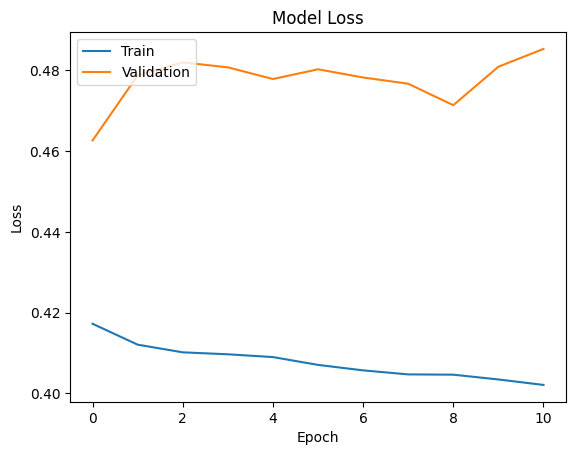

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

---

**Multi Class Classification**

---



In [29]:
x=tips.drop(['day'],axis=1)
y=tips['day']

# **Build Model**

In [31]:
model=Sequential([
    tf.keras.layers.Dense(6,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,801 (10.94 KB)

 Trainable params: 2,801 (10.94 KB)

 Non-trainable params: 0 (0.00 B)

# **Compile Model**

In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
early_stoping=EarlyStopping(patience=10)

**Train Model**

In [42]:
history_m=model.fit(X_train,y_train,epochs=50,batch_size=32,callbacks=[early_stoping],validation_split=0.2)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8152 - loss: 0.3969 - val_accuracy: 0.7436 - val_loss: 0.4822
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7944 - loss: 0.4412 - val_accuracy: 0.7692 - val_loss: 0.4785
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8482 - loss: 0.3853 - val_accuracy: 0.7436 - val_loss: 0.4841
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8360 - loss: 0.3795 - val_accuracy: 0.7436 - val_loss: 0.4936
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8348 - loss: 0.3642 - val_accuracy: 0.7436 - val_loss: 0.4916
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8373 - loss: 0.3821 - val_accuracy: 0.7692 - val_loss: 0.4820
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7957 - loss: 0.4179 - val_accuracy: 0.7692 - val_loss: 0.4758
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8295 - loss: 0.3965 - val_accuracy: 0.7436 - val_loss: 0.4858


# **Evaluate Model**

In [43]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7534 - loss: 0.4502
Test Loss: 0.4471
Test Accuracy: 75.51%


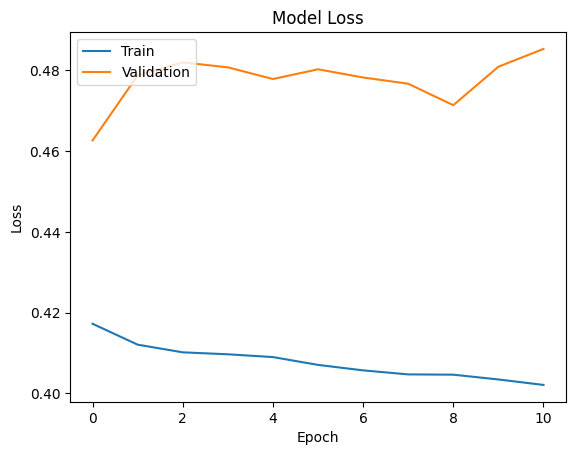

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')